In [1]:
from fastai import *
from fastai.vision import *

In [2]:
data = ImageDataBunch.from_folder('/content/drive/MyDrive/data/', train=".", valid_pct=0.3,
      ds_tfms=get_transforms(), size=256, num_workers=4 , bs=32).normalize(imagenet_stats)

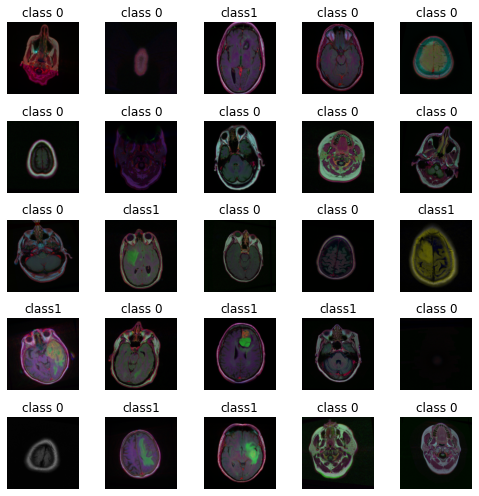

In [3]:
data.show_batch(rows=5 , figsize=(7,7))

In [64]:
learn=create_cnn(data, models.resnet34 ,metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [65]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.736441,0.530263,0.797629,00:37
1,0.512628,0.402866,0.823031,00:37
2,0.395105,0.300048,0.860288,00:37
3,0.327729,0.303412,0.858594,00:36


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


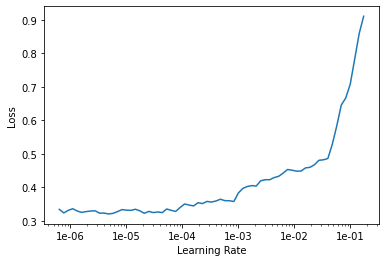

In [66]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


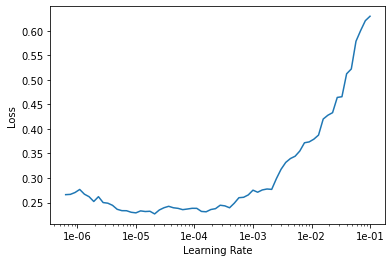

In [70]:
learn.lr_find()
learn.recorder.plot()

In [72]:
learn.fit_one_cycle(4, max_lr=slice(1e-06,1e-05))
learn.save('stage-4')

epoch,train_loss,valid_loss,accuracy,time
0,0.150980,0.184604,0.933954,00:38
1,0.142129,0.181839,0.935648,00:38
2,0.133759,0.164911,0.939881,00:38
3,0.124731,0.170174,0.935648,00:38
